# Popular Data Science Questions

In this project, let's assume that I'm working for a company that creates data science content, be it books, online articles, videos or interactive text-based platforms.

I'm tasked with figuring out what is best content to write about. So, I decide to scower the internet in search for the answer to the question "What is it that people want to learn about in data science?".

Thinking back to my experience when I first started learning programming, it occurs to me that if I wanted to figure out what programming content to write, I could consult [Stack Overflow](https://stackoverflow.com/) (a question and answer website about programming) and see what kind of content is more popular.

You decide to investigate Stack Overflow a little more and find out that it is part of a question and answer website network called [Stack Exchange](https://en.wikipedia.org/wiki/Stack_Exchange).

## Stack Exchange 

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and [data science](https://datascience.stackexchange.com/)!

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

If you open [this link](https://stackexchange.com/sites?view=list#percentanswered), you'll find a complete list of Stack Exchange websites sorted by percentage of questions that received answers. At the time of this writing, Data Science Stack Exchange (DSSE) is on the bottom 10 sites with respect to this metric.

The fact that DSSE is a data science dedicated site (contrarily to the others), coupled with it having a lot of an unanswered questions, makes it an ideal candidate for this investigation. DSSE will be the focus of this guided project.

The tagging system used by Stack Exchange looks just like what I need to solve this problem as it allow me to quantify how many questions are asked about each subject.



### What information is available in each post?

Looking, just as an example, at [this](https://datascience.stackexchange.com/questions/19141/linear-model-to-generate-probability-of-each-possible-output?rq=1) question, some of the information we see is:

* For both questions and answers:
    * The posts's score;
    * The posts's title;
    * The posts's author;
    * The posts's body;
* For questions only:
    * The last time the question as active;
    * How many times the question was viewed;
    * Related questions;
    * The question's tags;

## Stack Exchange Data Explorer

Perusing the table names, a few stand out as relevant for the goal:

* Posts
* PostTags
* Tags
* TagSynonyms

Running a few exploratory queries, leads me to focus my effort on `Posts` table. For examples, the `Tags` table looked very promising as it tells me how many times each tag was used, but there's no way to tell just from this if the interest in these tags is recent or a thing from the past.


<table>
  <tr>
    <th>Id</th>
    <th>TagName</th>
    <th>Count</th>
    <th>ExcerptPostId</th>
    <th>WikiPostId</th>
  </tr>
  <tr>
    <td>2</td>
    <td>machine-learning</td>
    <td>6919</td>
    <td>4909</td>
    <td>4908</td>
  </tr>
  <tr>
    <td>46</td>
    <td>python</td>
    <td>3907</td>
    <td>5523</td>
    <td>5522</td>
  </tr>
  <tr>
    <td>81</td>
    <td>neural-network</td>
    <td>2923</td>
    <td>8885</td>
    <td>8884</td>
  </tr>
  <tr>
    <td>194</td>
    <td>deep-learning</td>
    <td>2786</td>
    <td>8956</td>
    <td>8955</td>
  </tr>
  <tr>
    <td>77</td>
    <td>classification</td>
    <td>1899</td>
    <td>4911</td>
    <td>4910</td>
  </tr>
</table>

The posts table has a lot of columns. I'll be focusing the attention on those that seem relevant towards the goal:

- `Id`: An identification number for the post.
- `PostTypeId`: An identification number for the type of post.
- `CreationDate`: The date and time of creation of the post.
- `Score`: The post's score.
- `ViewCount`: How many times the post was viewed.
- `Tags`: What tags were used.
- `AnswerCount`: How many answers the question got (only applicable to question posts).
-`FavoriteCount`: How many times the question was favored (only applicable to question posts).

The last few columns contain information about how popular the post is — the kind of information I'm after.

Anything that isn't questions or answers is mostly inconsequential. Even if it happens to be the case that such kind of posts is immensely popular, they would just be outliers and not relevant to me. I'll then just focus on the questions.

Since I'm only interested in recent posts, I'll limit my analysis to the posts of 2019.

## Getting the Data

To get the relevant data I run the following query.

```
SELECT Id, CreationDate,
       Score, ViewCount, Tags,
       AnswerCount, FavoriteCount
  FROM posts
 WHERE PostTypeId = 1 AND YEAR(CreationDate) = 2019;
```
The result of the query was stored in a file called `2019_questions.csv`.
Here's what the first few rows look like:

<table>
  <tr>
    <th>Id</th>
    <th>PostTypeId</th>
    <th>CreationDate</th>
    <th>Score</th>
    <th>ViewCount</th>
    <th>Tags</th>
    <th>AnswerCount</th>
    <th>FavoriteCount</th>
  </tr>
  <tr>
    <td>44419</td>
    <td>1</td>
    <td>2019-01-23 09:21:13</td>
    <td>1</td>
    <td>21</td>
    <td>&lt;machine-learning&gt;&lt;data-mining&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
  <tr>
    <td>44420</td>
    <td>1</td>
    <td>2019-01-23 09:34:01</td>
    <td>0</td>
    <td>25</td>
    <td>&lt;machine-learning&gt;&lt;regression&gt;&lt;linear-regression&gt;&lt;regularization&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
  <tr>
    <td>44423</td>
    <td>1</td>
    <td>2019-01-23 09:58:41</td>
    <td>2</td>
    <td>1651</td>
    <td>&lt;python&gt;&lt;time-series&gt;&lt;forecast&gt;&lt;forecasting&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
  <tr>
    <td>44427</td>
    <td>1</td>
    <td>2019-01-23 10:57:09</td>
    <td>0</td>
    <td>55</td>
    <td>&lt;machine-learning&gt;&lt;scikit-learn&gt;&lt;pca&gt;</td>
    <td>1</td>
    <td></td>
  </tr>
  <tr>
    <td>44428</td>
    <td>1</td>
    <td>2019-01-23 11:02:15</td>
    <td>0</td>
    <td>19</td>
    <td>&lt;dataset&gt;&lt;bigdata&gt;&lt;data&gt;&lt;speech-to-text&gt;</td>
    <td>0</td>
    <td></td>
  </tr>
</table>

# Exploring the Data

I can read in the data while immediately making sure `CreationDate` will be stored as a datetime object:

In [0]:
# We import everything that we'll use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
questions = pd.read_csv("/content/2019_questions.csv", parse_dates=["CreationDate"])

Running [`questions.info()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) should gives a lot of useful information.

In [100]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


It's possible to see that only `FavoriteCount` has missing values. A missing value on this column probably means that the question wasn't present in any users' favorite list, so we can replace the missing values with zero.

The types seem adequate for every column, however, after I fill in the missing values on `FavoriteCount`, there is no reason to store the values as floats.

# Data Cleaning

I'll begin by fixing `FavoriteCount`.

In [101]:
questions.fillna(value={"FavoriteCount": 0}, inplace=True)
questions["FavoriteCount"] = questions["FavoriteCount"].astype(int)
questions.dtypes

Id                        int64
CreationDate     datetime64[ns]
Score                     int64
ViewCount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount             int64
dtype: object

Let's now modify `Tags` to make it easier to work with.

In [102]:
questions["Tags"] = questions["Tags"].str.strip(r"[<>]").str.split("><")
questions.sample(3)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
6568,64304,2019-12-06 00:22:55,1,11,[efficiency],0,0
2292,58413,2019-08-30 08:03:56,0,48,"[python, numpy]",1,0
5672,51992,2019-05-15 08:12:08,0,168,"[data, data-cleaning, beginner]",2,0


# Data Analysis

## Most Used and Most Viewed `Tags`

I'll begin by creating a dataframe of all the tags to store how many times each tag was used and its post viewed.

In [103]:
# Select all the Tags
all_tags = set(questions["Tags"].sum())

# Create the dataframe
df_tag = pd.DataFrame(0, index=all_tags, columns=["Count", "ViewCount"])

df_tag.head()

,Count,ViewCount
gradient-descent,0,0
allennlp,0,0
distributed,0,0
dialog-flow,0,0
parquet,0,0


Now I need to create a function that will be useful to extract how many times each tag was used and its post viewed from the `questions` dataframe.



In [0]:
def extract_count(row):
  # Take the index of the row
  idx = row.name

  for i in row["Tags"]:
    df_tag.loc[i, "Count"] += 1
    df_tag.loc[i, "ViewCount"] += questions.loc[idx, "ViewCount"]

Let's apply `extract_count` function to fill the dataframe.

In [105]:
questions.apply(extract_count, axis=1)

df_tag.head(10)

,Count,ViewCount
gradient-descent,98,14837
allennlp,2,183
distributed,7,227
dialog-flow,2,51
parquet,1,17
reinforcement-learning,203,20101
competitions,2,125
gaussian-process,12,471
rbf,5,359
pooling,4,160


 Let's visualize `Count` and `ViewCount` data side by side with a threshold of `20` because popularity of the tags rapidly declines, so looking at these tags should be enough to help us with the goal.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb884ec79b0>],
      dtype=object)

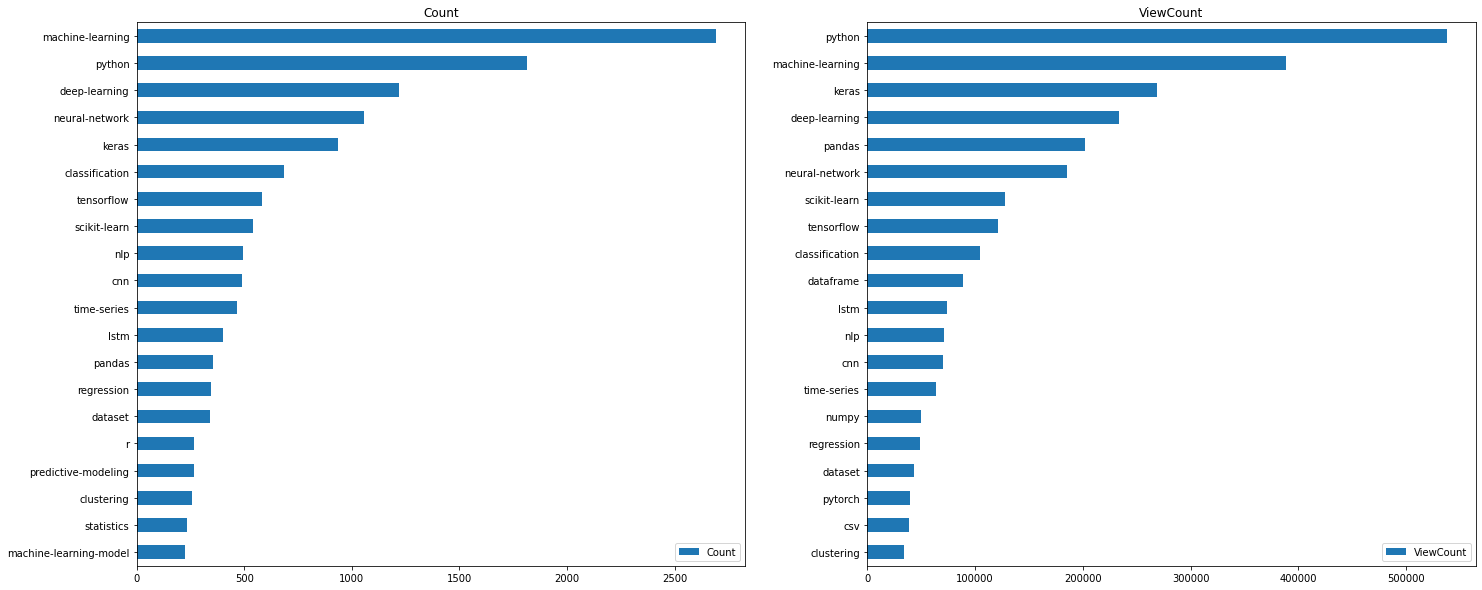

In [106]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
df_tag.sort_values("Count").tail(20).plot.barh(y="Count", ax=axes[0], subplots=True)
df_tag.sort_values("ViewCount").tail(20).plot.barh(y="ViewCount", ax=axes[1], subplots=True)

Some tags are very, very broad and are unlikely to be useful; e.g.: `python`, `dataset`, `r`.

## Relations Between `Tags`

One way of trying to gauge how pairs of tags are related to each other, is to count how many times each pair appears together.

I'll now create a dataframe where each row will represent a tag, and each column as well.

In [107]:
associations = pd.DataFrame(0, index=all_tags, columns=all_tags, dtype=float)

associations.iloc[0:4,0:4]

,gradient-descent,allennlp,distributed,dialog-flow
gradient-descent,0.0,0.0,0.0,0.0
allennlp,0.0,0.0,0.0,0.0
distributed,0.0,0.0,0.0,0.0
dialog-flow,0.0,0.0,0.0,0.0


Now for each lists of tags in `questions["Tags"]`, I will increment the intervening tags by one. The end result will be a dataframe that for each pair of tags, it tells us how many times they were used together.

In [0]:
for tags in questions["Tags"]:
    associations.loc[tags, tags] += 1

This dataframe is quite large. Let's focus our attention on the most used tags.

In [0]:
most_used_tags = df_tag.sort_values("Count").tail(20).index

relations_most_used = associations.loc[most_used_tags, most_used_tags]

It's hard for a human to understand what is going on in this dataframe. Let's create a heatmap. But before I do it, let's get rid of the diagonal values, otherwise the colors will be too skewed.

In [0]:
# Get rid of the diagonal values
np.fill_diagonal(relations_most_used.values, np.NaN)

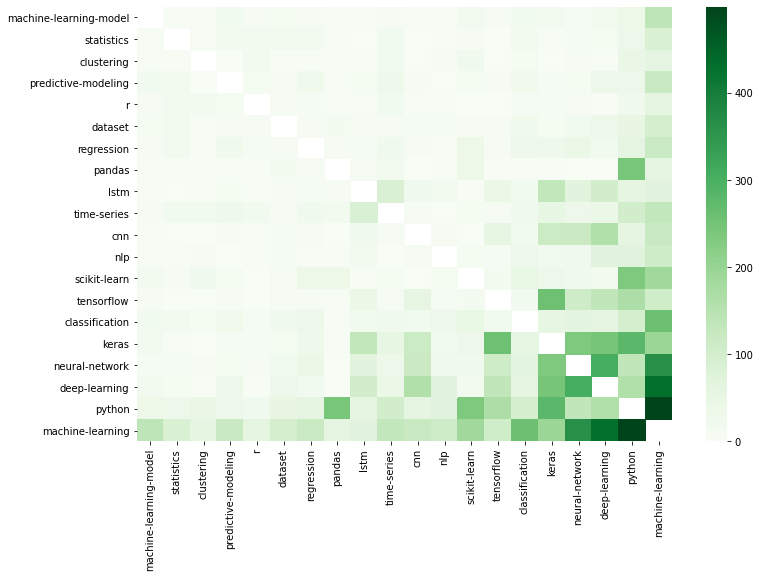

In [111]:
# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the bottom right corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

# Enter Domain Knowledge

[Keras](https://keras.io/), [scikit-learn](https://scikit-learn.org/), [TensorFlow](https://www.tensorflow.org/) are all Python libraries that allow their users to employ deep learning (a type of neural network).

Most of the top tags are all intimately related with one central machine learning theme: deep learning. If I want to be very specific, I can suggest the creation of Python content that uses deep learning for classification problems (and other variations of this suggestion).

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by the analysis, is deep learning.

## Is Deep Learning just a Fad?

Before I officially make our recommendation, it would be nice to solidy the findings with additional proof. More specifically, one thing that comes to mind is "Is deep learning just a fad?" Ideally, the content I decide to create will be the most useful for as long as possible. Could interest in deep learning be slowing down?

The file `all_questions.csv` holds the result of the query below — this query fetches all of the questions ever asked on DSSE, their dates and tags:
```
SELECT Id, CreationDate, Tags
  FROM posts
 WHERE PostTypeId = 1;
```

Let's read in the file into a dataframe called `all_q`. I'll parse the dates at read-time.

In [0]:
all_q = pd.read_csv("/content/all_questions.csv", parse_dates=["CreationDate"])

It's possible to use the same technique as before to clean the tags column.

In [0]:
all_q["Tags"] = all_q["Tags"].str.strip(r"[<>]").str.split("><")

Before deciding which questions should be classified as being deep learning questions, I should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag I'll use is: a tag that belongs to the list `["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"]`.

This list was obtained by looking at all the tags in `most_used:tags` and seeing which ones had any relation to deep learning.

I'll now create a function that assigns `1` to deep learning questions and `0` otherwise.

In [0]:
def class_deep_learning(tags):
    for tag in tags:
        if tag in ["lstm", "cnn", "scikit-learn", "tensorflow",
                   "keras", "neural-network", "deep-learning"]:
            return 1
    return 0

In [0]:
all_q["DeepLearning"] = all_q["Tags"].apply(class_deep_learning)

In [116]:
all_q.sample(5)

,Id,CreationDate,Tags,DeepLearning
12256,9664,2016-01-07 06:01:43,"[machine-learning, data-mining, clustering, k-...",0
21306,36313,2018-08-01 13:49:38,"[nlp, text-mining, preprocessing]",0
2884,56598,2019-07-30 05:02:26,"[machine-learning, classification, nlp, featur...",0
9421,19186,2017-05-24 16:13:03,"[machine-learning, classification, regression,...",1
9879,19437,2017-06-02 20:28:51,"[machine-learning, python, neural-network, cla...",1


Looks good!

The data-science-techonology landscape isn't something as dynamic to merit daily, weekly, or even monthly tracking. Let's track it quarterly.

Since I don't have all the data for the first quarter of 2020, I'll get rid of those dates:

In [0]:
all_q = all_q[all_q["CreationDate"].dt.year < 2020]

Let's create a column that identifies the quarter in which a question was asked.

In [0]:
def fetch_quarter(datetime):
    year = str(datetime.year)[-2:]
    quarter = str(((datetime.month-1) // 3) + 1)
    return "{y}Q{q}".format(y=year, q=quarter)

all_q["Quarter"] = all_q["CreationDate"].apply(fetch_quarter)

In [119]:
all_q.head()

,Id,CreationDate,Tags,DeepLearning,Quarter
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]",1,19Q1
1,45418,2019-02-12 00:50:39,[neural-network],1,19Q1
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]",0,19Q1
3,45426,2019-02-12 04:51:49,[keras],1,19Q1
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode...",0,19Q1


For the final stretch of this screen, I'll group by quarter and:

* Count the number of deep learning questions.
* Count the total number of questions.
* Compute the ratio between the two numbers above.

In [120]:
quarterly = all_q.groupby('Quarter').agg({"DeepLearning": ['sum', 'size']})
quarterly.columns = ['DeepLearningQuestions', 'TotalQuestions']
quarterly["DeepLearningRate"] = quarterly["DeepLearningQuestions"]\
                                /quarterly["TotalQuestions"]
# The following is done to help with visualizations later.
quarterly.reset_index(inplace=True)
quarterly.sample(5)

,Quarter,DeepLearningQuestions,TotalQuestions,DeepLearningRate
13,17Q3,247,714,0.345938
20,19Q2,935,2393,0.390723
8,16Q2,109,518,0.210425
16,18Q2,566,1448,0.390884
0,14Q2,9,157,0.057325


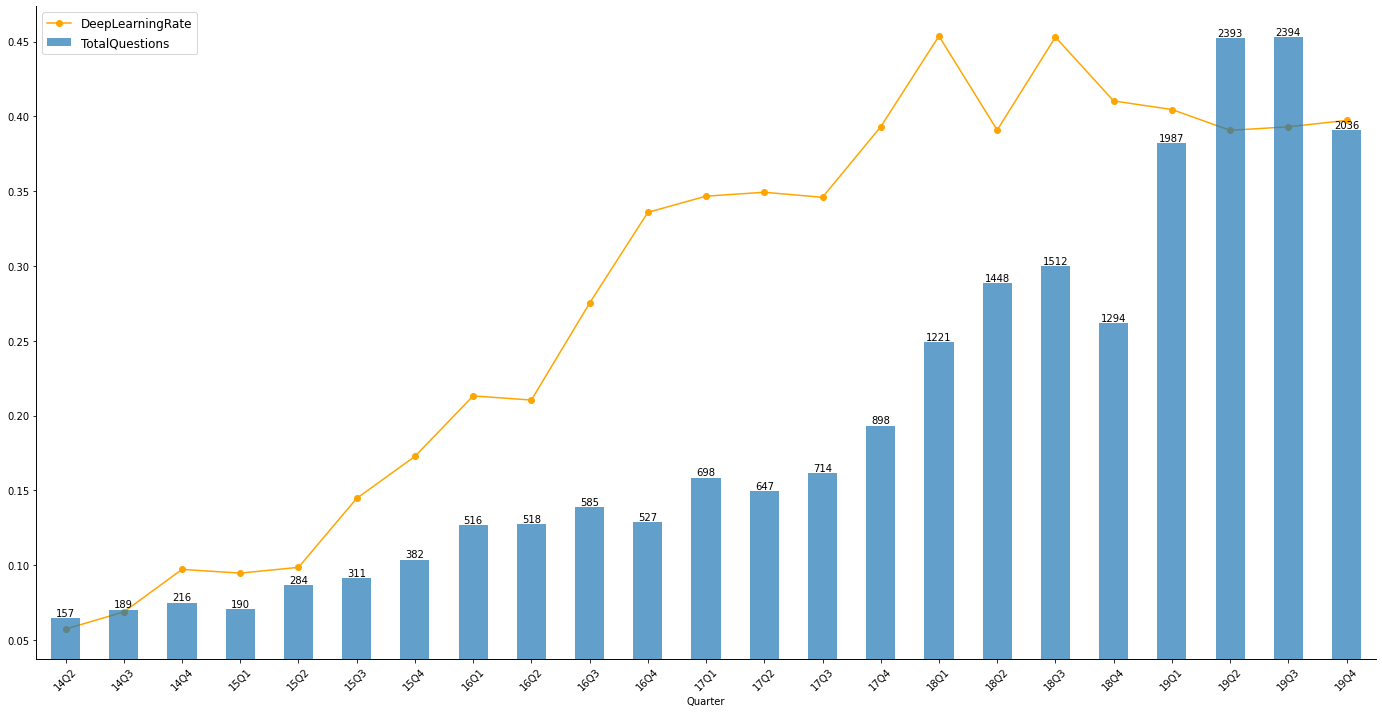

In [121]:
ax1 = quarterly.plot(x="Quarter", y="DeepLearningRate",
                    kind="line", linestyle="-", marker="o", color="orange",
                    figsize=(24,12)
                    )

ax2 = quarterly.plot(x="Quarter", y="TotalQuestions",
                     kind="bar", ax=ax1, secondary_y=True, alpha=0.7, rot=45)

for idx, t in enumerate(quarterly["TotalQuestions"]):
    ax2.text(idx, t, str(t), ha="center", va="bottom")
xlims = ax1.get_xlim()

ax1.get_legend().remove()

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 12})


for ax in (ax1, ax2):
    for where in ("top", "right"):
        ax.spines[where].set_visible(False)
        ax.tick_params(right=False, labelright=False)

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing and so I maintain my previous idea of proposing to create deep learning content.